In [1]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers.legacy import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
le = preprocessing.LabelEncoder()

In [3]:
try:
    GPUlist = tf.config.list_physical_devices('GPU')
    print(GPUlist)
    for i in GPUlist:
        tf.config.experimental.set_memory_growth(i, True)
except:
    pass

In [14]:
def cleanData(data):
    colsToDrop = ["Id", "Alley", "PoolQC", "Fence", 'LandContour', 'Street', 'MSZoning','MiscFeature', 'PoolArea',
                 'Condition1','Condition2','Utilities','BldgType','LandSlope','3SsnPorch','ScreenPorch','EnclosedPorch',
                 'GarageQual','GarageCond','PavedDrive','SaleType']
    data = data.drop(columns=colsToDrop, axis=1)
    allCols = list(data)
    for col in allCols:
        data[col].fillna(data[col].mode()[0], inplace=True)
    return data


trainData = pd.read_csv('train.csv')
testData = pd.read_csv('test.csv')
testID = testData['Id']

trainData = cleanData(trainData)
testData = cleanData(testData)

for col in trainData.select_dtypes(exclude=[float, int]).columns:
    trainData[col] = le.fit_transform(trainData[col])
    testData[col] = le.transform(testData[col])

print(trainData.head(50))

    MSSubClass  LotFrontage  LotArea  LotShape  LotConfig  Neighborhood  \
0           60         65.0     8450         3          4             5   
1           20         80.0     9600         3          2            24   
2           60         68.0    11250         0          4             5   
3           70         60.0     9550         0          0             6   
4           60         84.0    14260         0          2            15   
5           50         85.0    14115         0          4            11   
6           20         75.0    10084         3          4            21   
7           60         60.0    10382         0          0            14   
8           50         51.0     6120         3          4            17   
9          190         50.0     7420         3          0             3   
10          20         70.0    11200         3          4            19   
11          60         85.0    11924         0          4            16   
12          20         60

In [15]:
Y = trainData['SalePrice']
X = trainData.drop(['SalePrice'], axis=1)
trainX, valX,trainY, valY = train_test_split(X,Y,test_size=0.2)

In [16]:
# clf = LinearRegression().fit(trainX,trainY)
# r2_score = clf.score(valX, valY)
# print(r2_score*100,'%')

# preds = clf.predict(testData)
# results = pd.DataFrame({"Id": testID, "SalePrice": preds})
# results.to_csv("results.csv", sep=',',index=False)

In [20]:
model = Sequential()
model.add(Dense(512, input_shape=(59,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1))


In [21]:
learning_reduce = ReduceLROnPlateau(patience=4,monitor="mean_squared_error",verbose=1,min_lr=0.00001,factor=0.5)
callbacks = [learning_reduce]

In [22]:
model.compile(loss='mean_squared_error', optimizer=RMSprop(learning_rate=0.1), metrics=["mean_squared_error"])
history = model.fit(trainX, trainY, validation_data=(valX, valY), epochs=100, callbacks=callbacks)

Epoch 1/100
37/37 [==============================] - 1s 9ms/step - loss: 693118500864.0000 - mean_squared_error: 693118500864.0000 - val_loss: 5795608576.0000 - val_mean_squared_error: 5795608576.0000 - lr: 0.1000
Epoch 2/100
37/37 [==============================] - 0s 6ms/step - loss: 4532922880.0000 - mean_squared_error: 4532922880.0000 - val_loss: 4042501376.0000 - val_mean_squared_error: 4042501376.0000 - lr: 0.1000
Epoch 3/100
37/37 [==============================] - 0s 6ms/step - loss: 6485230080.0000 - mean_squared_error: 6485230080.0000 - val_loss: 5349044224.0000 - val_mean_squared_error: 5349044224.0000 - lr: 0.1000
Epoch 4/100
37/37 [==============================] - 0s 6ms/step - loss: 4952835584.0000 - mean_squared_error: 4952835584.0000 - val_loss: 11183503360.0000 - val_mean_squared_error: 11183503360.0000 - lr: 0.1000
Epoch 5/100
37/37 [==============================] - 0s 6ms/step - loss: 7028132352.0000 - mean_squared_error: 7028132352.0000 - val_loss: 6654050304.0000

34/37 [==========================>...] - ETA: 0s - loss: 2081473024.0000 - mean_squared_error: 2081473024.0000
Epoch 36: ReduceLROnPlateau reducing learning rate to 0.0031250000465661287.
37/37 [==============================] - 0s 6ms/step - loss: 2077120000.0000 - mean_squared_error: 2077120000.0000 - val_loss: 2962097152.0000 - val_mean_squared_error: 2962097152.0000 - lr: 0.0063
Epoch 37/100
37/37 [==============================] - 0s 6ms/step - loss: 1750177280.0000 - mean_squared_error: 1750177280.0000 - val_loss: 3608602112.0000 - val_mean_squared_error: 3608602112.0000 - lr: 0.0031
Epoch 38/100
37/37 [==============================] - 0s 6ms/step - loss: 1738100608.0000 - mean_squared_error: 1738100608.0000 - val_loss: 3493999104.0000 - val_mean_squared_error: 3493999104.0000 - lr: 0.0031
Epoch 39/100
37/37 [==============================] - 0s 6ms/step - loss: 1705346688.0000 - mean_squared_error: 1705346688.0000 - val_loss: 3359870208.0000 - val_mean_squared_error: 3359870208

37/37 [==============================] - 0s 6ms/step - loss: 1751609216.0000 - mean_squared_error: 1751609216.0000 - val_loss: 3275159552.0000 - val_mean_squared_error: 3275159552.0000 - lr: 9.7656e-05
Epoch 70/100
37/37 [==============================] - 0s 6ms/step - loss: 1655661824.0000 - mean_squared_error: 1655661824.0000 - val_loss: 3263223040.0000 - val_mean_squared_error: 3263223040.0000 - lr: 9.7656e-05
Epoch 71/100
37/37 [==============================] - 0s 6ms/step - loss: 1748428928.0000 - mean_squared_error: 1748428928.0000 - val_loss: 3266092800.0000 - val_mean_squared_error: 3266092800.0000 - lr: 9.7656e-05
Epoch 72/100
34/37 [==========================>...] - ETA: 0s - loss: 1662432128.0000 - mean_squared_error: 1662432128.0000
Epoch 72: ReduceLROnPlateau reducing learning rate to 4.882812572759576e-05.
37/37 [==============================] - 0s 6ms/step - loss: 1653333760.0000 - mean_squared_error: 1653333760.0000 - val_loss: 3263979264.0000 - val_mean_squared_error

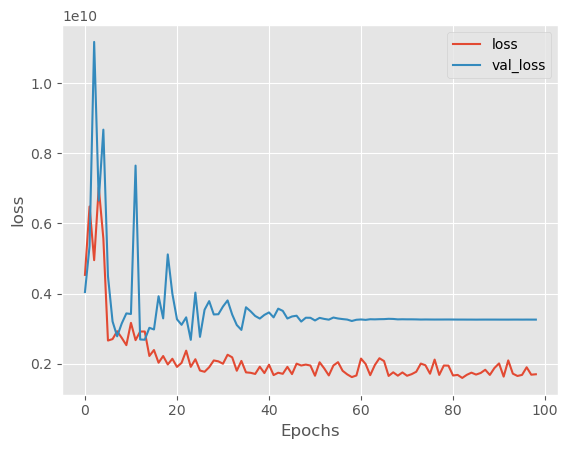

In [23]:
def plot_graphs(history, string):
    plt.plot(history.history[string][1:])
    plt.plot(history.history["val_"+string][1:])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string,"val_"+string])
    plt.show()
plot_graphs(history,'loss')

In [24]:
yPred = model.predict(testData)
yPred.shape

46/46 [==============================] - 0s 2ms/step


(1459, 1)

In [25]:
yPred = yPred[:, 0]
yPred.shape

(1459,)

In [26]:
results = pd.DataFrame({"Id": testID, "SalePrice": yPred})
results.to_csv("results2.csv", sep=',',index=False)